In [116]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font='Arial')

In [117]:
df = pd.read_csv('..\\data\\pareto\\sales_act.csv',index_col=0)
df=df.join(pd.read_csv('..\\data\\pareto\\sales_sa.csv',index_col=0))
df=df.join(pd.read_csv('..\\data\\pareto\\new_list_act.csv',index_col=0))
df=df.join(pd.read_csv('..\\data\\pareto\\new_list_sa.csv',index_col=0))

df.index=df.index.rename('Date')

<AxesSubplot:title={'center':'New Listings'}, xlabel='Date'>

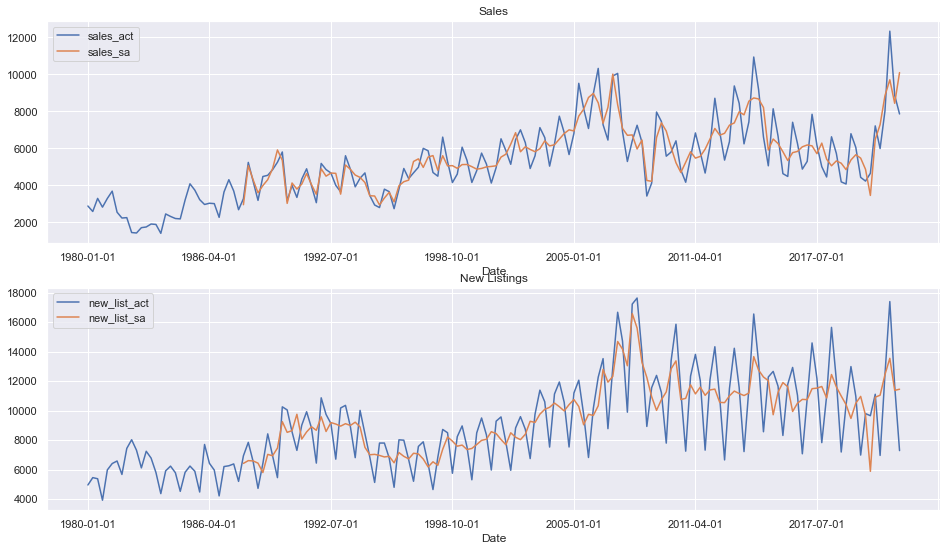

In [118]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(16,9))

df[['sales_act','sales_sa']].plot(ax=ax[0],title='Sales')
df[['new_list_act','new_list_sa']].plot(ax=ax[1],title='New Listings')

In [119]:
real_income = pd.read_excel('../data/BaselineProvincialForecasts.xlsx',sheet_name='RealDisposableIncome',engine='openpyxl',index_col=0)[['AB']]
real_income.rename({'AB':'RealDisposableIncome'},axis=1,inplace=True)

real_gdp = pd.read_excel('../data/BaselineProvincialForecasts.xlsx',sheet_name='RealGDP',engine='openpyxl',index_col=0)[['AB']]
real_gdp.rename({'AB':'RealGDP'},axis=1,inplace=True)

unemp = pd.read_excel('../data/BaselineProvincialForecasts.xlsx',sheet_name='Unemployment',engine='openpyxl',index_col=0)[['AB']]
unemp.rename({'AB':'Unemployment'},axis=1,inplace=True)

employment = pd.read_excel('../data/BaselineProvincialForecasts.xlsx',sheet_name='Employment',engine='openpyxl',index_col=0)[['AB']]
employment.rename({'AB':'Employment'},axis=1,inplace=True)

cpi = pd.read_excel('../data/BaselineProvincialForecasts.xlsx',sheet_name='CPI',engine='openpyxl',index_col=0,header=1)[['AB']]
cpi.rename({'AB':'CPI'},axis=1,inplace=True)

prov_econ=real_gdp.join(real_income)
prov_econ=prov_econ.join(unemp)
prov_econ=prov_econ.join(employment)
prov_econ=prov_econ.join(cpi)
prov_econ.index=prov_econ.index.rename('Date')
prov_econ.index=pd.PeriodIndex(prov_econ.index,freq='Q').to_timestamp()

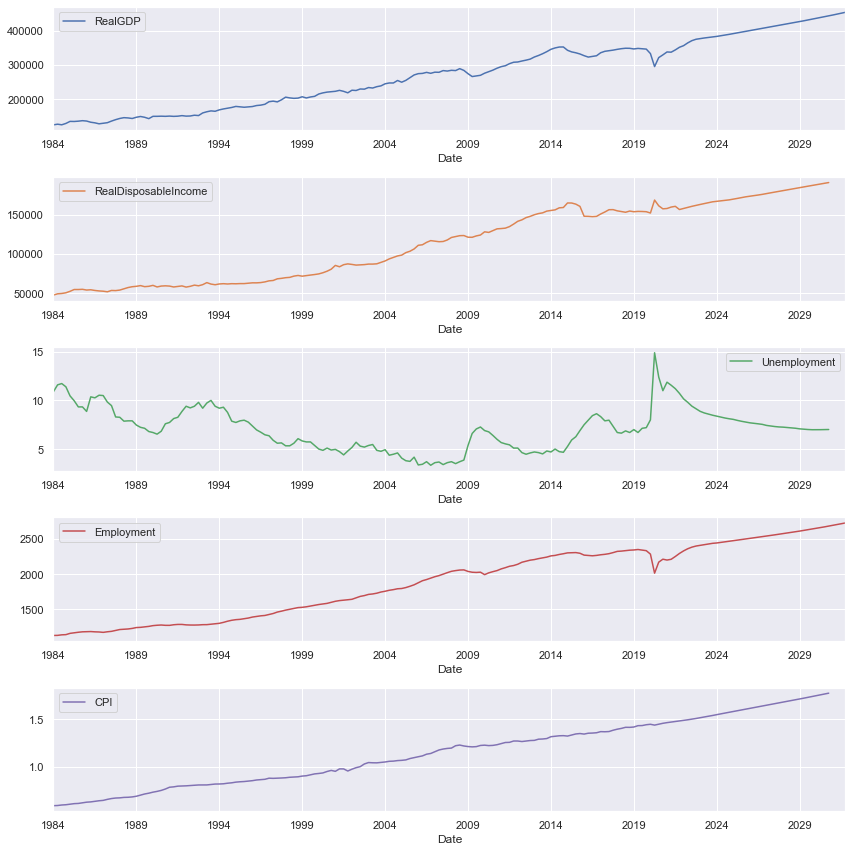

In [120]:

fig, ax = plt.subplots(nrows=5,ncols=1,figsize=(12,12))
prov_econ.plot(ax=ax,subplots=True)
plt.tight_layout()

In [121]:
prov_econ

,RealGDP,RealDisposableIncome,Unemployment,Employment,CPI
Date,,,,,
1984-01-01,124537.696000,47427.905649,10.900000,1131.646718,0.593435
1984-04-01,126432.684000,49015.069966,11.600000,1132.964409,0.595181
1984-07-01,124688.800000,49448.102005,11.733333,1140.598043,0.600481
1984-10-01,128648.819000,50330.216996,11.400000,1143.396344,0.603223
1985-01-01,134650.900000,52204.214947,10.466667,1161.538977,0.608993
...,...,...,...,...,...
2030-10-01,443518.991283,191244.926228,7.009560,2681.132009,1.771857
2031-01-01,446062.788990,NaN,NaN,2691.908079,NaN
2031-04-01,448636.526604,NaN,NaN,2702.917741,NaN


In [160]:
nat_econ=pd.read_excel('../data/BaselineNationalForecasts.xlsx',header=1,index_col=0,engine='openpyxl',sheet_name='Quarterly')[3:-11]
energy = pd.read_excel('../data/BaselineNationalForecasts.xlsx',sheet_name='Energy',header=0,index_col=0,engine='openpyxl')

In [161]:
nat_econ.index = nat_econ.index.str.replace(' ','')
nat_econ.index=nat_econ.index.rename('Date')
nat_econ.index=pd.PeriodIndex(nat_econ.index,freq='Q').to_timestamp()
energy.index = energy.index.str.replace(' ','')
energy.index=energy.index.rename('Date')
energy.index=pd.PeriodIndex(energy.index,freq='Q').to_timestamp()



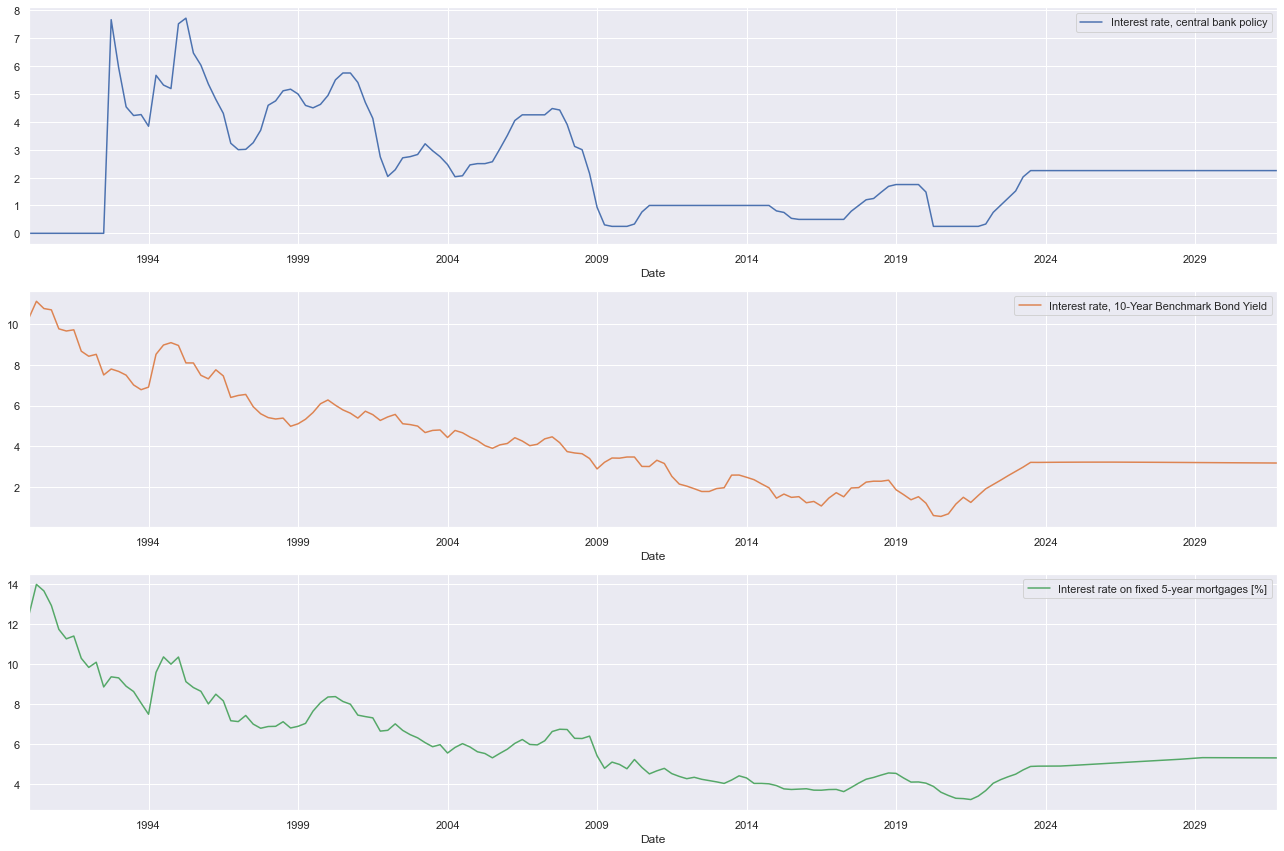

In [162]:

fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(18,12))
nat_econ['1990':][['Interest rate, central bank policy','Interest rate, 10-Year Benchmark Bond Yield','Interest rate on fixed 5-year mortgages [%]']].plot(ax=ax,subplots=True)
plt.tight_layout()

In [163]:
nat_econ['2019':'2024']

,"GDP, real, LCU",Unemployment rate,Consumer price index,"Employment, total","Income, personal disposable, real, LCU","Interest rate, central bank policy","Interest rate, 10-Year Benchmark Bond Yield",Interest rate on fixed 5-year mortgages [%],"Corporate borrowing rate, period average","World oil price, Brent crude spot, $pb",World Price Oil (West Texas Intermediate),"World oil price, Western Canada Select (WCS) crude, $pb"
Date,,,,,,,,,,,,
2019-01-01,520093,5.76667,134.733,18926.5,293685,1.75,1.85774,4.51667,3.69385,63.17,54.85,44.1
2019-04-01,525653,5.56667,135.833,19047.7,296699,1.75,1.62032,4.28667,3.53769,68.9233,59.7867,47.44
2019-07-01,528030,5.63333,136.367,19102,299153,1.75,1.36524,4.08,3.47385,61.93,56.4067,43.81
2019-10-01,528528,5.7,136.933,19124.5,301721,1.75,1.51564,4.08667,3.53077,63.41,56.9133,37.86
2020-01-01,518632,6.3,137.1,18842.4,304934,1.48077,1.19762,4.02667,3.38154,50.44,45.84,29.08
2020-04-01,459951,13,135.967,16695.6,341020,0.25,0.59,3.86333,2.72308,29.3433,27.8267,19.74
2020-07-01,500771,10.0333,136.967,18135.8,328187,0.25,0.545714,3.57333,2.39461,42.9633,40.8867,31.212
2020-10-01,508326,8.66667,137.933,18574,321462,0.25,0.673871,3.41,2.29615,44.29,42.5067,31.51
2021-01-01,505411,9.23155,138.433,18451.8,321300,0.25,1.15193,3.27,2.28207,51.1619,48.5638,32.0522


<AxesSubplot:xlabel='Date'>

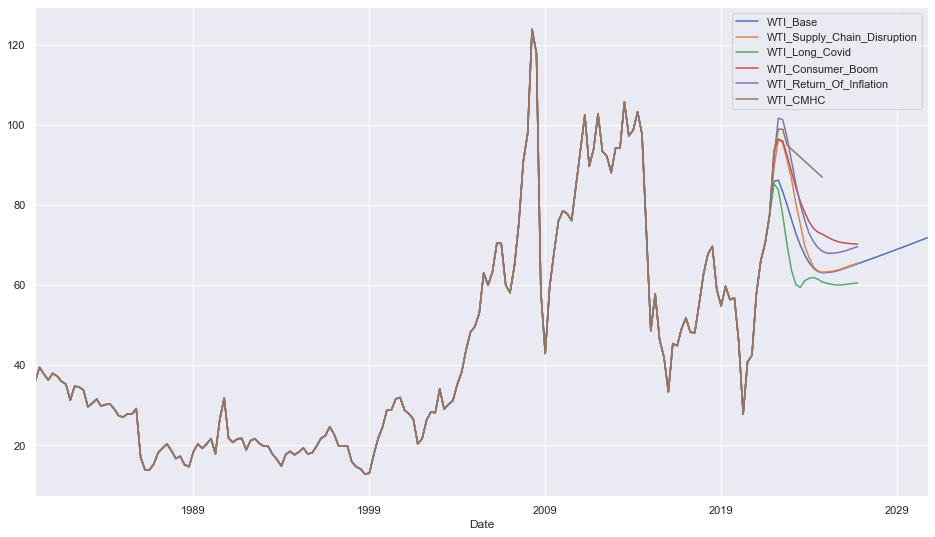

In [166]:
energy.plot(figsize=(16,9))

In [165]:
energy['2019':'2024']

,WTI_Base,WTI_Supply_Chain_Disruption,WTI_Long_Covid,WTI_Consumer_Boom,WTI_Return_Of_Inflation,WTI_CMHC
Date,,,,,,
2019-01-01,54.85000,54.85000,54.85000,54.85000,54.85000,54.85000
2019-04-01,59.78667,59.78667,59.78667,59.78667,59.78667,59.78667
2019-07-01,56.40667,56.40667,56.40667,56.40667,56.40667,56.40667
2019-10-01,56.91333,56.91333,56.91333,56.91333,56.91333,56.91333
2020-01-01,45.84000,45.84000,45.84000,45.84000,45.84000,45.84000
2020-04-01,27.82667,27.82667,27.82667,27.82667,27.82667,27.82667
2020-07-01,40.88667,40.88667,40.88667,40.88667,40.88667,40.88667
2020-10-01,42.50667,42.50667,42.50667,42.50667,42.50667,42.50667
2021-01-01,57.82333,57.82333,57.82333,57.82333,57.82333,57.82333


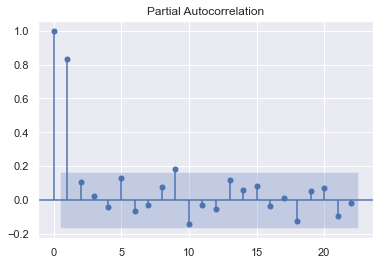

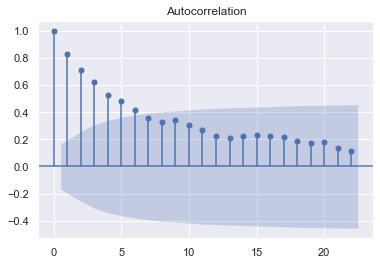

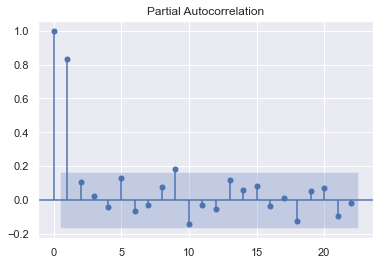

In [152]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df['sales_sa']['1988':])
plot_pacf(df['sales_sa']['1988':])

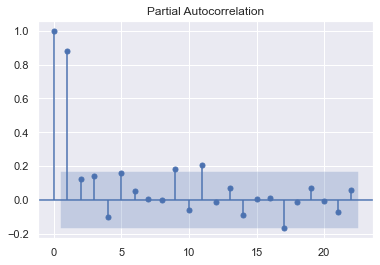

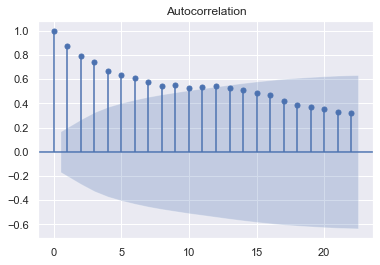

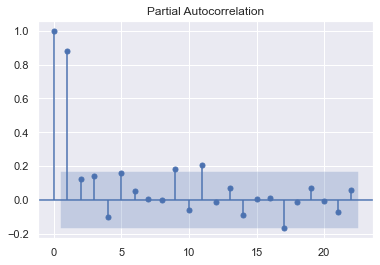

In [156]:
plot_acf(df['new_list_sa']['1988':])
plot_pacf(df['new_list_sa']['1988':])


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

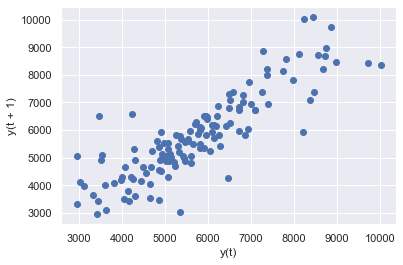

In [167]:
pd.plotting.lag_plot(df['sales_sa']['1988':])

In [169]:
df_diff = df.diff()
df_diff=df_diff.dropna()

In [171]:
df_diff

,sales_act,sales_sa,new_list_act,new_list_sa
Date,,,,
1988-04-01,1963.0,2111.0,908.0,186.0
1988-07-01,-1035.0,-766.0,-1303.0,-21.0
1988-10-01,-1019.0,-701.0,-1813.0,-151.0
1989-01-01,1291.0,392.0,1684.0,-635.0
1989-04-01,64.0,318.0,2008.0,1230.0
...,...,...,...,...
2020-10-01,-1224.0,799.0,-4143.0,138.0
2021-01-01,2032.0,1565.0,5478.0,1395.0
2021-04-01,4314.0,859.0,4943.0,1102.0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

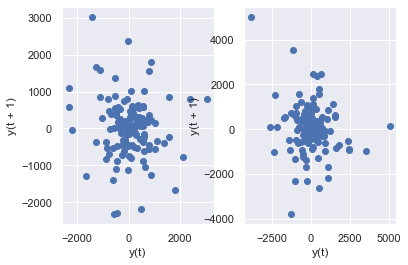

In [174]:
fig, ax =plt.subplots(nrows=1,ncols=2)
pd.plotting.lag_plot(df_diff['sales_sa']['1988':],ax=ax[0])
pd.plotting.lag_plot(df_diff['new_list_sa']['1988':],ax=ax[1])

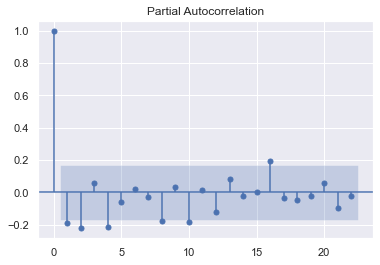

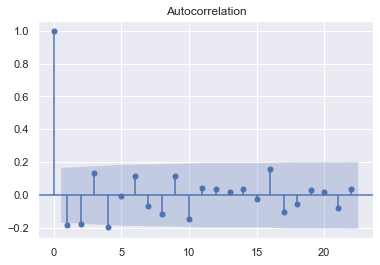

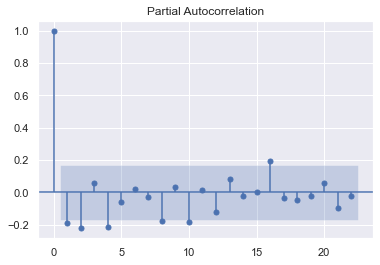

In [176]:
plot_acf(df_diff['new_list_sa']['1988':])
plot_pacf(df_diff['new_list_sa']['1988':])

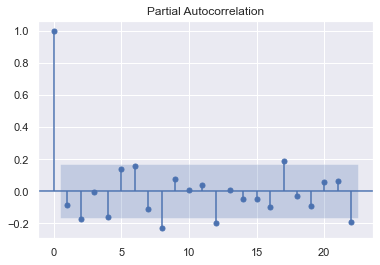

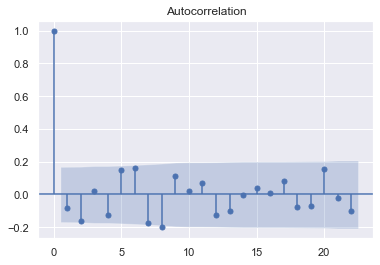

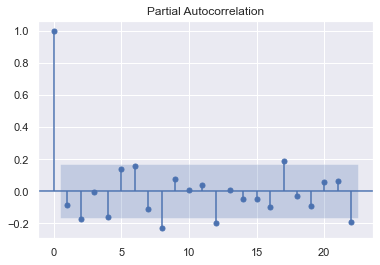

In [177]:
plot_acf(df_diff['sales_sa']['1988':])
plot_pacf(df_diff['sales_sa']['1988':])

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df_diff,order=(0,0,0))
model_fit = model.fit()

print(model_fit.summary())